# Midterm Exam: Data Analysis Project
**Author:** Abdanur Ayazbek  
**Dataset:** World Happiness Report (2019)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('2019.csv')

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           D

## Data Preparation and Exploration
I started by checking for missing values and duplicates to make sure the data is clean before I dive into the math.

In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Standardizing column names for easier access
df.columns = [c.replace(' ', '_') for c in df.columns]

Missing values:
 Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64
Duplicates: 0


## Descriptive Statistics
Here, I calculated the central tendency and dispersion for the Score and GDP per capita.

In [9]:
# Measures of central tendency
stats_summary = df[['Score', 'GDP_per_capita', 'Social_support']].describe()
mode_val = df['Score'].mode()[0]
print(stats_summary)
print(f"Mode of Happiness Score: {mode_val}")

# Grouped analysis by a custom categorical variable (e.g., high vs low score)
df['Happiness_Level'] = pd.qcut(df['Score'], q=3, labels=['Low', 'Medium', 'High'])
print(df.groupby('Happiness_Level', observed=False)[['Score', 'GDP_per_capita']].mean())

            Score  GDP_per_capita  Social_support
count  156.000000      156.000000      156.000000
mean     5.407096        0.905147        1.208814
std      1.113120        0.398389        0.299191
min      2.853000        0.000000        0.000000
25%      4.544500        0.602750        1.055750
50%      5.379500        0.960000        1.271500
75%      6.184500        1.232500        1.452500
max      7.769000        1.684000        1.624000
Mode of Happiness Score: 5.208
                    Score  GDP_per_capita
Happiness_Level                          
Low              4.170192        0.520615
Medium           5.406288        0.943212
High             6.644808        1.251615


## Data Visualization
I created five different charts to see how the numbers actually look.

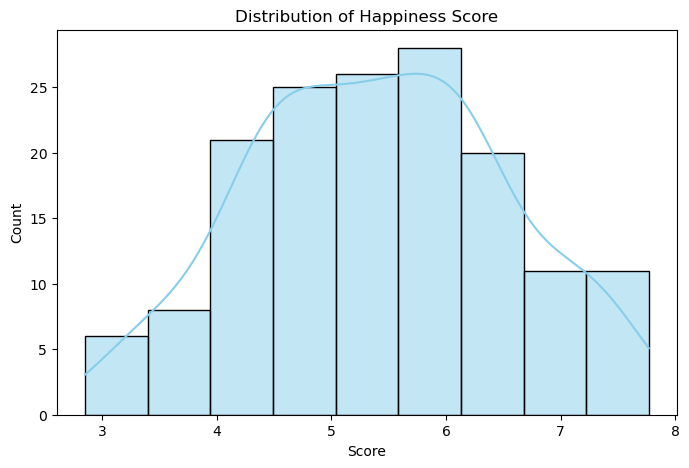

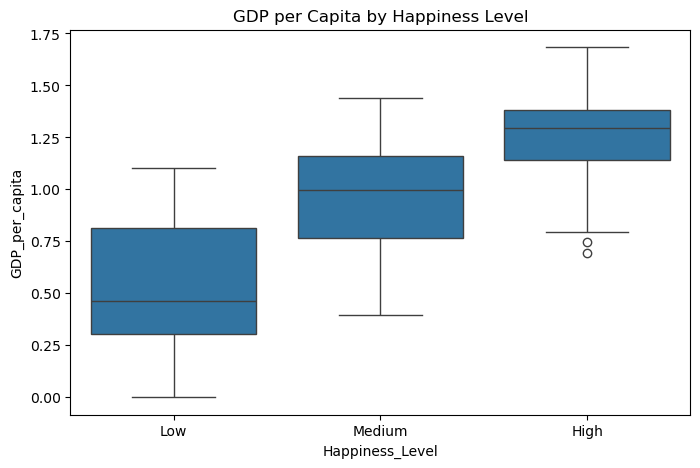

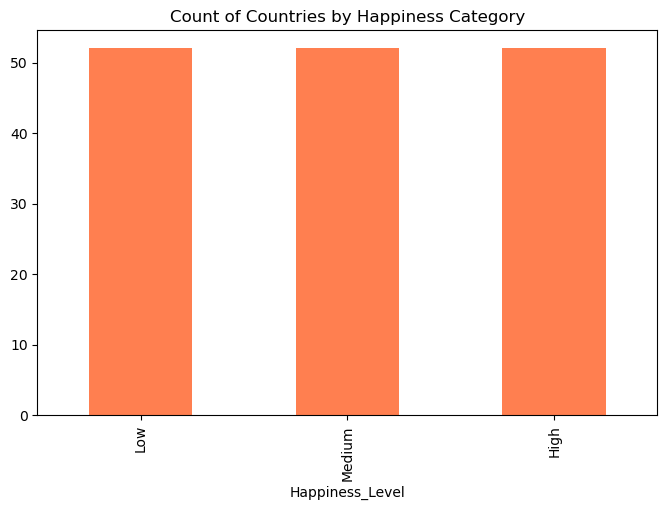

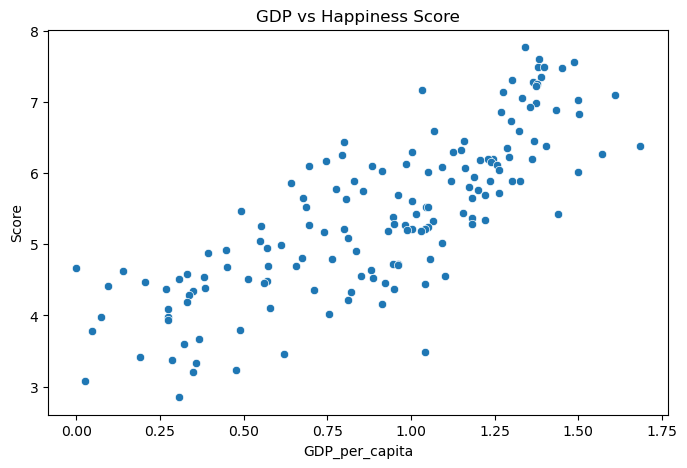

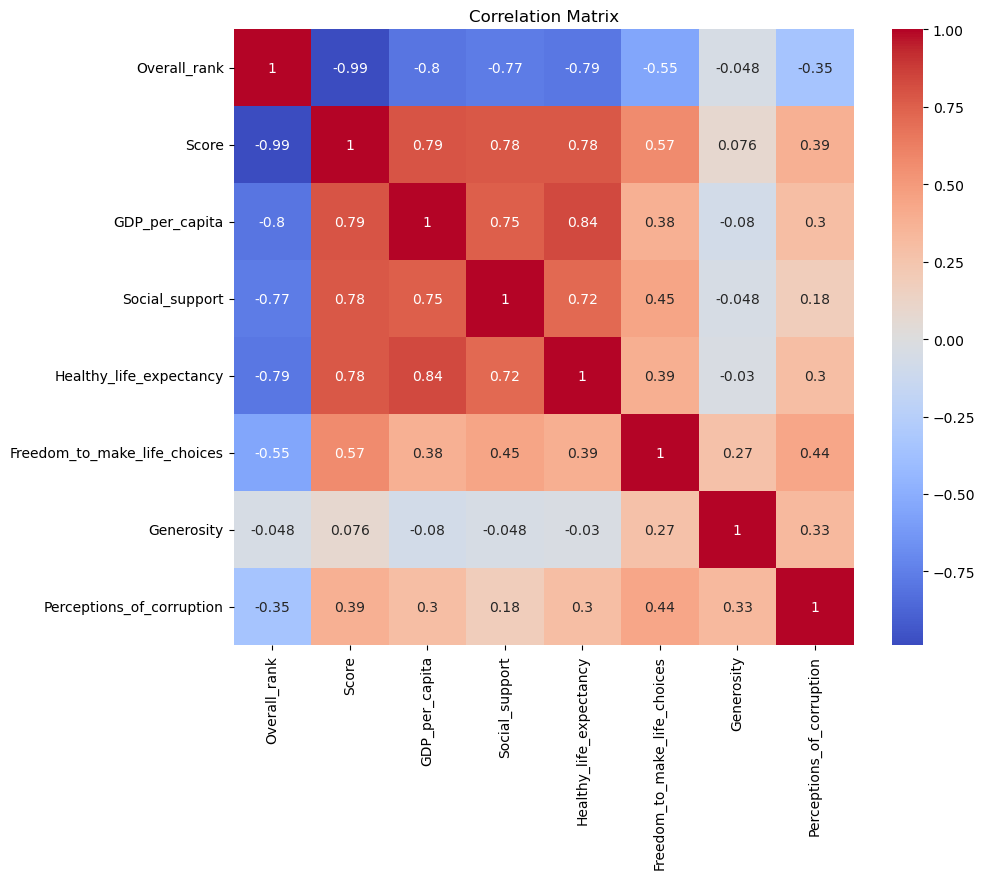

In [10]:
# 1. Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Score'], kde=True, color='skyblue')
plt.title('Distribution of Happiness Score')
plt.show()

# 2. Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Happiness_Level', y='GDP_per_capita', data=df)
plt.title('GDP per Capita by Happiness Level')
plt.show()

# 3. Bar Chart
plt.figure(figsize=(8, 5))
df['Happiness_Level'].value_counts().plot(kind='bar', color='coral')
plt.title('Count of Countries by Happiness Category')
plt.show()

# 4. Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='GDP_per_capita', y='Score', data=df)
plt.title('GDP vs Happiness Score')
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Relationship and Distribution Analysis
I wanted to see the correlation strength and check if the Happiness Score follows a normal distribution.

Pearson Correlation between Score and GDP: 0.79


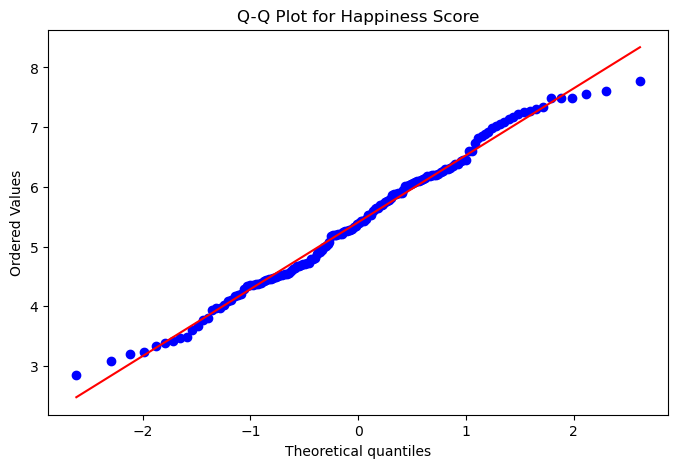

In [11]:
# Pearson correlation
correlation = df['Score'].corr(df['GDP_per_capita'])
print(f"Pearson Correlation between Score and GDP: {correlation:.2f}")

# Q-Q Plot for Normality
plt.figure(figsize=(8, 5))
stats.probplot(df['Score'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Happiness Score')
plt.show()